# **AI TECH INSTITUTE** · *Intermediate AI & Data Science*
### Week 03 · Notebook 05 — Data Warehousing Fundamentals: Your First Star Schema 🌟
**Instructor:** Amir Charkhi  |  **Goal:** Understand data warehousing from zero and build your first star schema
> Format: theory → implementation → best practices → real-world application.
>
**Learning Objectives:**
- Understand what a data warehouse is and why companies need them
- Learn the difference between regular databases and data warehouses
- Master the star schema concept (critical for interviews!)
- Build your first star schema from scratch
- Understand fact tables, dimension tables, and how they connect

**Time:** 90 minutes | **Prerequisites:** Basic SQL knowledge

---

## 🎯 The Problem We're Solving

Imagine you work at **Amazon**:
- 300 million customers
- 12 million products
- 1.6 million packages shipped daily

**The CEO asks:** "What were our top-selling products last Christmas?"

**Problem:** Your regular database with customer orders is:
- Too slow (billions of rows)
- Too complex (100+ tables)
- Changing constantly (can't run reports)

**Solution:** A DATA WAREHOUSE! 🏭

Let's learn what this means...

In [25]:
# Import libraries we'll need
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up nice visuals
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries loaded!")
print("Ready to learn about data warehouses! 🚀")

✅ Libraries loaded!
Ready to learn about data warehouses! 🚀


---

## 📚 Part 1: What is a Data Warehouse?

### Theory (5 minutes)

Think of it this way:
- **Regular Database** = Your messy closet (everything thrown in)
- **Data Warehouse** = Your organized wardrobe (everything sorted by type)

**Key Differences:**

| Regular Database (OLTP) | Data Warehouse (OLAP) |
|------------------------|----------------------|
| For daily operations | For analysis & reporting |
| Current data only | Historical data (years) |
| Fast inserts/updates | Fast queries |
| Normalized (no duplicates) | Denormalized (duplicates OK) |
| Complex structure | Simple structure |

**What do companies use data warehouses for?**
1. **Business Intelligence**: "What are sales trends?"
2. **Reporting**: Monthly/quarterly reports
3. **Analytics**: Customer behavior patterns
4. **Machine Learning**: Training data for models
5. **Decision Making**: Data-driven strategies

### Let's See the Difference with Code!

In [26]:
# Example 1: Regular Database (OLTP) - Complex and Normalized
print("🗄️ REGULAR DATABASE (OLTP) - Like your daily operations\n")
print("Imagine this is your online store's database:")
print()

# This is how data looks in a regular database
regular_db_structure = """
📁 Regular Database Tables:
├── customers (customer_id, name, email, address_id)
├── addresses (address_id, street, city, state, zip)
├── orders (order_id, customer_id, order_date, status)
├── order_items (item_id, order_id, product_id, quantity, price)
├── products (product_id, name, category_id, supplier_id)
├── categories (category_id, name, parent_category_id)
├── suppliers (supplier_id, name, contact_id)
└── ... (and 20 more tables!)
"""
print(regular_db_structure)

print("❌ Problem: To answer 'What did customer X buy?', you need to JOIN 5+ tables!")
print("❌ Problem: Very slow for analytical queries")
print("❌ Problem: Complex for business users")

🗄️ REGULAR DATABASE (OLTP) - Like your daily operations

Imagine this is your online store's database:


📁 Regular Database Tables:
├── customers (customer_id, name, email, address_id)
├── addresses (address_id, street, city, state, zip)
├── orders (order_id, customer_id, order_date, status)
├── order_items (item_id, order_id, product_id, quantity, price)
├── products (product_id, name, category_id, supplier_id)
├── categories (category_id, name, parent_category_id)
├── suppliers (supplier_id, name, contact_id)
└── ... (and 20 more tables!)

❌ Problem: To answer 'What did customer X buy?', you need to JOIN 5+ tables!
❌ Problem: Very slow for analytical queries
❌ Problem: Complex for business users


In [27]:
# Example 2: Data Warehouse (OLAP) - Simple and Fast
print("🏭 DATA WAREHOUSE (OLAP) - Optimized for analysis\n")
print("Same data, but reorganized for speed:")
print()

warehouse_structure = """
📊 Data Warehouse Tables (Star Schema):
├── fact_sales (The CENTER - all sales transactions)
│   └── Links to all dimensions below
├── dim_customer (Everything about customers)
├── dim_product (Everything about products)
├── dim_date (Calendar information)
└── dim_store (Store information)

That's it! Only 5 tables instead of 30!
"""
print(warehouse_structure)

print("✅ Benefit: To answer any question, you need at most 1-2 JOINs")
print("✅ Benefit: 10-100x faster for analytical queries")
print("✅ Benefit: Business users can understand it")

🏭 DATA WAREHOUSE (OLAP) - Optimized for analysis

Same data, but reorganized for speed:


📊 Data Warehouse Tables (Star Schema):
├── fact_sales (The CENTER - all sales transactions)
│   └── Links to all dimensions below
├── dim_customer (Everything about customers)
├── dim_product (Everything about products)
├── dim_date (Calendar information)
└── dim_store (Store information)

That's it! Only 5 tables instead of 30!

✅ Benefit: To answer any question, you need at most 1-2 JOINs
✅ Benefit: 10-100x faster for analytical queries
✅ Benefit: Business users can understand it


---

## ⭐ Part 2: What is a Star Schema?

### Theory (5 minutes)

**Star Schema** = The most popular way to organize a data warehouse

Why is it called a "star"? Because it looks like one! ⭐
- **Center**: Fact table (the star's center)
- **Points**: Dimension tables (the star's points)

**Two Types of Tables:**
1. **FACT Table**: The "what happened" (transactions, events, measurements)
2. **DIMENSION Tables**: The "context" (who, what, when, where, why)

⭐ STAR SCHEMA VISUALIZATION



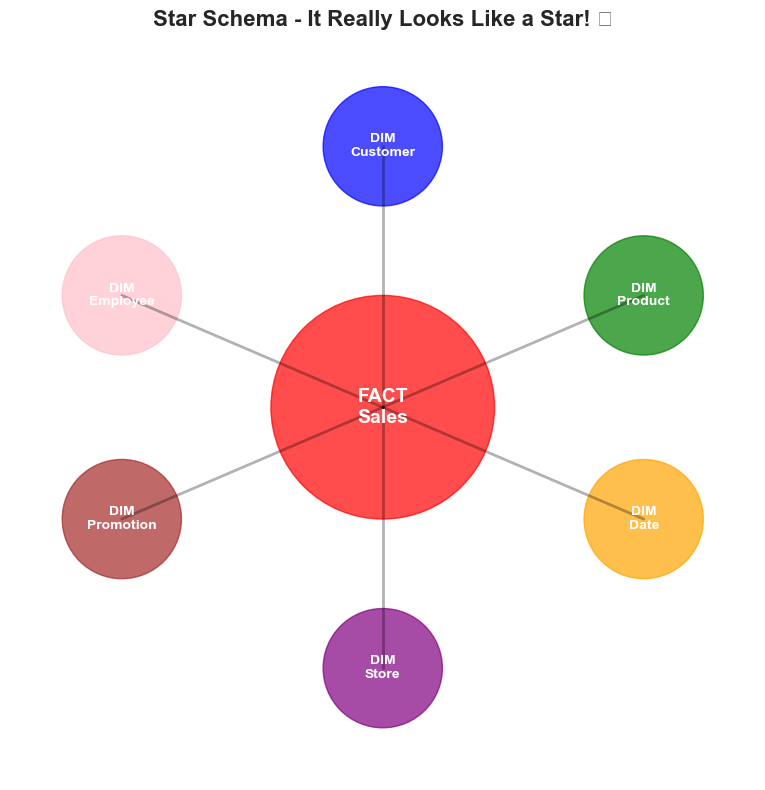


🔑 Key Points:
• The FACT table is in the center (red)
• DIMENSION tables surround it (colored)
• Each dimension connects to the fact table
• This simple structure makes queries FAST!


In [28]:
# Let's visualize a star schema!
print("⭐ STAR SCHEMA VISUALIZATION\n")

# Create a simple visualization
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the center (Fact table)
center = plt.Circle((0.5, 0.5), 0.15, color='red', alpha=0.7)
ax.add_patch(center)
ax.text(0.5, 0.5, 'FACT\nSales', ha='center', va='center', 
        fontsize=14, fontweight='bold', color='white')

# Draw the dimensions (star points)
dimensions = [
    {'name': 'DIM\nCustomer', 'x': 0.5, 'y': 0.85, 'color': 'blue'},
    {'name': 'DIM\nProduct', 'x': 0.85, 'y': 0.65, 'color': 'green'},
    {'name': 'DIM\nDate', 'x': 0.85, 'y': 0.35, 'color': 'orange'},
    {'name': 'DIM\nStore', 'x': 0.5, 'y': 0.15, 'color': 'purple'},
    {'name': 'DIM\nPromotion', 'x': 0.15, 'y': 0.35, 'color': 'brown'},
    {'name': 'DIM\nEmployee', 'x': 0.15, 'y': 0.65, 'color': 'pink'}
]

for dim in dimensions:
    # Draw dimension circle
    circle = plt.Circle((dim['x'], dim['y']), 0.08, color=dim['color'], alpha=0.7)
    ax.add_patch(circle)
    ax.text(dim['x'], dim['y'], dim['name'], ha='center', va='center',
            fontsize=10, fontweight='bold', color='white')
    
    # Draw line from center to dimension
    ax.plot([0.5, dim['x']], [0.5, dim['y']], 'k-', alpha=0.3, linewidth=2)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Star Schema - It Really Looks Like a Star! ⭐', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔑 Key Points:")
print("• The FACT table is in the center (red)")
print("• DIMENSION tables surround it (colored)")
print("• Each dimension connects to the fact table")
print("• This simple structure makes queries FAST!")

### Understanding Fact vs Dimension Tables

In [29]:
print("📊 FACT vs DIMENSION TABLES EXPLAINED\n")

# Create example data to show the difference
fact_vs_dimension = pd.DataFrame({
    'Aspect': ['What it stores', 'Examples', 'Size', 'Changes', 'Purpose'],
    'FACT Table': [
        'Events/Transactions (what happened)',
        'Sales, Orders, Clicks, Views',
        'Millions/Billions of rows',
        'Grows daily (append-only)',
        'Stores measurements & metrics'
    ],
    'DIMENSION Table': [
        'Context/Descriptions (who/what/where)',
        'Customers, Products, Dates, Stores',
        'Hundreds/Thousands of rows',
        'Rarely changes (mostly static)',
        'Provides context for analysis'
    ]
})

print(fact_vs_dimension.to_string(index=False))

print("\n" + "="*60)
print("\n💡 Think of it like a receipt:")
print("• FACT = The purchase itself ($29.99 on 2024-01-15)")
print("• DIMENSIONS = The details (WHO: John, WHAT: Shoes, WHERE: NYC Store)")

📊 FACT vs DIMENSION TABLES EXPLAINED

        Aspect                          FACT Table                       DIMENSION Table
What it stores Events/Transactions (what happened) Context/Descriptions (who/what/where)
      Examples        Sales, Orders, Clicks, Views    Customers, Products, Dates, Stores
          Size           Millions/Billions of rows            Hundreds/Thousands of rows
       Changes           Grows daily (append-only)        Rarely changes (mostly static)
       Purpose       Stores measurements & metrics         Provides context for analysis


💡 Think of it like a receipt:
• FACT = The purchase itself ($29.99 on 2024-01-15)
• DIMENSIONS = The details (WHO: John, WHAT: Shoes, WHERE: NYC Store)


---

## 🏗️ Part 3: Building Your First Star Schema

Let's build a real star schema step by step!

**Scenario**: You run a small online bookstore 📚

### Step 1: Create Dimension Tables

In [30]:
print("📚 BUILDING A BOOKSTORE DATA WAREHOUSE\n")
print("Step 1: Create Dimension Tables\n")

# Create database connection
conn = sqlite3.connect('bookstore_warehouse.db')
cursor = conn.cursor()

# Clean up if exists
cursor.execute("DROP TABLE IF EXISTS dim_customer")
cursor.execute("DROP TABLE IF EXISTS dim_book")
cursor.execute("DROP TABLE IF EXISTS dim_date")
cursor.execute("DROP TABLE IF EXISTS fact_sales")

print("Creating dimension tables...\n")

📚 BUILDING A BOOKSTORE DATA WAREHOUSE

Step 1: Create Dimension Tables

Creating dimension tables...



In [31]:
# DIMENSION 1: Customer Dimension
print("1️⃣ Creating DIM_CUSTOMER (Who bought?)")

# Create customer dimension table
cursor.execute("""
CREATE TABLE dim_customer (
    customer_key INTEGER PRIMARY KEY,
    customer_id TEXT,
    customer_name TEXT,
    email TEXT,
    city TEXT,
    country TEXT,
    customer_type TEXT,
    registration_date DATE
)
""")

# Create sample customer data
customers = pd.DataFrame({
    'customer_key': range(1, 11),
    'customer_id': [f'CUST_{i:03d}' for i in range(1, 11)],
    'customer_name': ['Alice Brown', 'Bob Smith', 'Charlie Davis', 'Diana Wilson',
                     'Eve Johnson', 'Frank Miller', 'Grace Lee', 'Henry Taylor',
                     'Iris Anderson', 'Jack Thomas'],
    'email': [f'{name.lower().replace(" ", "")}@email.com' 
             for name in ['Alice Brown', 'Bob Smith', 'Charlie Davis', 'Diana Wilson',
                         'Eve Johnson', 'Frank Miller', 'Grace Lee', 'Henry Taylor',
                         'Iris Anderson', 'Jack Thomas']],
    'city': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
            'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose'],
    'country': ['USA'] * 10,
    'customer_type': ['Regular', 'Premium', 'Regular', 'Premium', 'Regular',
                     'Premium', 'Regular', 'Regular', 'Premium', 'Regular'],
    'registration_date': pd.date_range('2023-01-01', periods=10, freq='W')
})

# Insert into database
customers.to_sql('dim_customer', conn, if_exists='append', index=False)

print("✅ Created dim_customer table")
print("Sample data:")
print(customers.head(3))
print()

1️⃣ Creating DIM_CUSTOMER (Who bought?)
✅ Created dim_customer table
Sample data:
   customer_key customer_id  customer_name                   email  \
0             1    CUST_001    Alice Brown    alicebrown@email.com   
1             2    CUST_002      Bob Smith      bobsmith@email.com   
2             3    CUST_003  Charlie Davis  charliedavis@email.com   

          city country customer_type registration_date  
0     New York     USA       Regular        2023-01-01  
1  Los Angeles     USA       Premium        2023-01-08  
2      Chicago     USA       Regular        2023-01-15  



In [32]:
# DIMENSION 2: Book/Product Dimension
print("2️⃣ Creating DIM_BOOK (What was bought?)")

# Create book dimension table
cursor.execute("""
CREATE TABLE dim_book (
    book_key INTEGER PRIMARY KEY,
    book_id TEXT,
    title TEXT,
    author TEXT,
    genre TEXT,
    price DECIMAL(10,2),
    publisher TEXT,
    publication_year INTEGER
)
""")

# Create sample book data
books = pd.DataFrame({
    'book_key': range(1, 16),
    'book_id': [f'BOOK_{i:03d}' for i in range(1, 16)],
    'title': ['The Great Adventure', 'Mystery at Midnight', 'Love in Paris',
             'The Science of Everything', 'Cooking Made Easy', 'History Revisited',
             'Fantasy World', 'Crime and Justice', 'The Business Mind',
             'Poetry Collection', 'Children Stories', 'Travel Guide Europe',
             'Fitness for Life', 'The Art of Code', 'Philosophy 101'],
    'author': ['John Smith', 'Mary Johnson', 'Robert Brown', 'Lisa Davis',
              'Michael Wilson', 'Jennifer Garcia', 'David Martinez', 'Sarah Anderson',
              'James Taylor', 'Emma Thomas', 'Oliver Jackson', 'Sophia White',
              'William Harris', 'Ava Martin', 'Lucas Thompson'],
    'genre': ['Adventure', 'Mystery', 'Romance', 'Science', 'Cooking',
             'History', 'Fantasy', 'Crime', 'Business', 'Poetry',
             'Children', 'Travel', 'Health', 'Technology', 'Philosophy'],
    'price': [19.99, 24.99, 14.99, 29.99, 22.99,
             26.99, 18.99, 21.99, 34.99, 12.99,
             9.99, 16.99, 19.99, 39.99, 24.99],
    'publisher': ['Penguin', 'HarperCollins', 'Random House', 'McGraw-Hill', 'Penguin'] * 3,
    'publication_year': [2020, 2021, 2022, 2023, 2021,
                        2020, 2022, 2023, 2021, 2020,
                        2023, 2022, 2021, 2023, 2020]
})

# Insert into database
books.to_sql('dim_book', conn, if_exists='append', index=False)

print("✅ Created dim_book table")
print("Sample data:")
print(books.head(3))
print()

2️⃣ Creating DIM_BOOK (What was bought?)
✅ Created dim_book table
Sample data:
   book_key   book_id                title        author      genre  price  \
0         1  BOOK_001  The Great Adventure    John Smith  Adventure  19.99   
1         2  BOOK_002  Mystery at Midnight  Mary Johnson    Mystery  24.99   
2         3  BOOK_003        Love in Paris  Robert Brown    Romance  14.99   

       publisher  publication_year  
0        Penguin              2020  
1  HarperCollins              2021  
2   Random House              2022  



In [33]:
# DIMENSION 3: Date Dimension
print("3️⃣ Creating DIM_DATE (When did it happen?)")

# Create date dimension table
cursor.execute("""
CREATE TABLE dim_date (
    date_key INTEGER PRIMARY KEY,
    full_date DATE,
    year INTEGER,
    quarter INTEGER,
    month INTEGER,
    month_name TEXT,
    day INTEGER,
    day_name TEXT,
    is_weekend INTEGER,
    is_holiday INTEGER
)
""")

# Create date range for 2024
date_range = pd.date_range('2024-01-01', '2024-12-31', freq='D')

# Create date dimension data
dates = pd.DataFrame({
    'date_key': [int(d.strftime('%Y%m%d')) for d in date_range],
    'full_date': date_range,
    'year': date_range.year,
    'quarter': date_range.quarter,
    'month': date_range.month,
    'month_name': date_range.strftime('%B'),
    'day': date_range.day,
    'day_name': date_range.strftime('%A'),
    'is_weekend': (date_range.dayofweek >= 5).astype(int),
    'is_holiday': 0  # Simplified - you'd mark actual holidays
})

# Insert into database
dates.to_sql('dim_date', conn, if_exists='append', index=False)

print("✅ Created dim_date table")
print(f"Loaded {len(dates)} dates for year 2024")
print("Sample data:")
print(dates.head(3))
print()

3️⃣ Creating DIM_DATE (When did it happen?)
✅ Created dim_date table
Loaded 366 dates for year 2024
Sample data:
   date_key  full_date  year  quarter  month month_name  day   day_name  \
0  20240101 2024-01-01  2024        1      1    January    1     Monday   
1  20240102 2024-01-02  2024        1      1    January    2    Tuesday   
2  20240103 2024-01-03  2024        1      1    January    3  Wednesday   

   is_weekend  is_holiday  
0           0           0  
1           0           0  
2           0           0  



### Step 2: Create the Fact Table

In [34]:
print("💰 Creating FACT_SALES (The actual sales transactions)\n")

# Create fact table
cursor.execute("""
CREATE TABLE fact_sales (
    sale_id INTEGER PRIMARY KEY,
    date_key INTEGER,
    customer_key INTEGER,
    book_key INTEGER,
    quantity INTEGER,
    unit_price DECIMAL(10,2),
    discount_percent DECIMAL(5,2),
    total_amount DECIMAL(10,2),
    FOREIGN KEY (date_key) REFERENCES dim_date(date_key),
    FOREIGN KEY (customer_key) REFERENCES dim_customer(customer_key),
    FOREIGN KEY (book_key) REFERENCES dim_book(book_key)
)
""")

print("✅ Created fact_sales table structure")
print()
print("📌 Notice: The fact table has:")
print("  • Foreign keys to all dimensions (date_key, customer_key, book_key)")
print("  • Measures/metrics (quantity, price, discount, total_amount)")
print("  • No descriptive text - that's in the dimensions!")

💰 Creating FACT_SALES (The actual sales transactions)

✅ Created fact_sales table structure

📌 Notice: The fact table has:
  • Foreign keys to all dimensions (date_key, customer_key, book_key)
  • Measures/metrics (quantity, price, discount, total_amount)
  • No descriptive text - that's in the dimensions!


In [35]:
# Generate sample sales data
print("📊 Generating sample sales transactions...\n")

np.random.seed(42)
n_sales = 500

# Generate random sales
sales_data = []
for i in range(n_sales):
    # Pick random date in 2024
    date_key = (pd.Timestamp('2024-01-01') + 
                  timedelta(days=np.random.randint(0, 365))).strftime('%Y%m%d')
    
    # Pick random customer and book
    customer_key = np.random.randint(1, 11)
    book_key = np.random.randint(1, 16)
    
    # Get book price
    book_price = books[books['book_key'] == book_key]['price'].iloc[0]
    
    # Generate sale details
    quantity = np.random.randint(1, 4)
    discount = np.random.choice([0, 5, 10, 15, 20], p=[0.5, 0.2, 0.15, 0.1, 0.05])
    total = quantity * book_price * (1 - discount/100)
    
    sales_data.append({
        'sale_id': i + 1,
        'date_key': date_key,
        'customer_key': customer_key,
        'book_key': book_key,
        'quantity': quantity,
        'unit_price': book_price,
        'discount_percent': discount,
        'total_amount': round(total, 2)
    })

# Create DataFrame and insert
fact_sales = pd.DataFrame(sales_data)
fact_sales.to_sql('fact_sales', conn, if_exists='append', index=False)

print(f"✅ Generated and loaded {n_sales} sales transactions")
print("\nSample fact table data:")
print(fact_sales.head())
print()
print(f"Total revenue: ${fact_sales['total_amount'].sum():,.2f}")

📊 Generating sample sales transactions...

✅ Generated and loaded 500 sales transactions

Sample fact table data:
   sale_id  date_key  customer_key  book_key  quantity  unit_price  \
0        1  20240412             4        13         3       19.99   
1        2  20240707             5         7         2       18.99   
2        3  20241126             8         5         3       22.99   
3        4  20240914             8        12         2       16.99   
4        5  20240710             5         1         2       19.99   

   discount_percent  total_amount  
0                10         53.97  
1                 0         37.98  
2                 0         68.97  
3                 0         33.98  
4                 5         37.98  

Total revenue: $21,096.23


---

## 🔍 Part 4: Using Your Star Schema

Now let's see why star schemas are so powerful for analysis!

In [36]:
print("⭐ STAR SCHEMA IN ACTION!\n")
print("Let's answer business questions with simple queries...\n")

⭐ STAR SCHEMA IN ACTION!

Let's answer business questions with simple queries...



In [37]:
# Question 1: Top selling books
print("📚 Question 1: What are our top 5 selling books?")

query1 = """
SELECT 
    b.title,
    b.author,
    SUM(f.quantity) as total_sold,
    SUM(f.total_amount) as total_revenue
FROM fact_sales f
JOIN dim_book b ON f.book_key = b.book_key
GROUP BY b.title, b.author
ORDER BY total_sold DESC
LIMIT 5
"""

result1 = pd.read_sql(query1, conn)
print("\nAnswer:")
print(result1)
print("\n✅ Notice: Just ONE simple JOIN to answer this!")

📚 Question 1: What are our top 5 selling books?

Answer:
                 title          author  total_sold  total_revenue
0  Travel Guide Europe    Sophia White          96        1553.70
1  The Great Adventure      John Smith          85        1634.15
2    Poetry Collection     Emma Thomas          80        1004.10
3    Crime and Justice  Sarah Anderson          79        1655.82
4     Fitness for Life  William Harris          76        1460.24

✅ Notice: Just ONE simple JOIN to answer this!


📅 Question 2: How do sales vary by month?

Answer:
  month_name  month  num_sales  monthly_revenue
0    January      1         49          2111.79
1   February      2         40          1821.37
2      March      3         42          1641.57
3      April      4         42          1959.64
4        May      5         44          1732.00


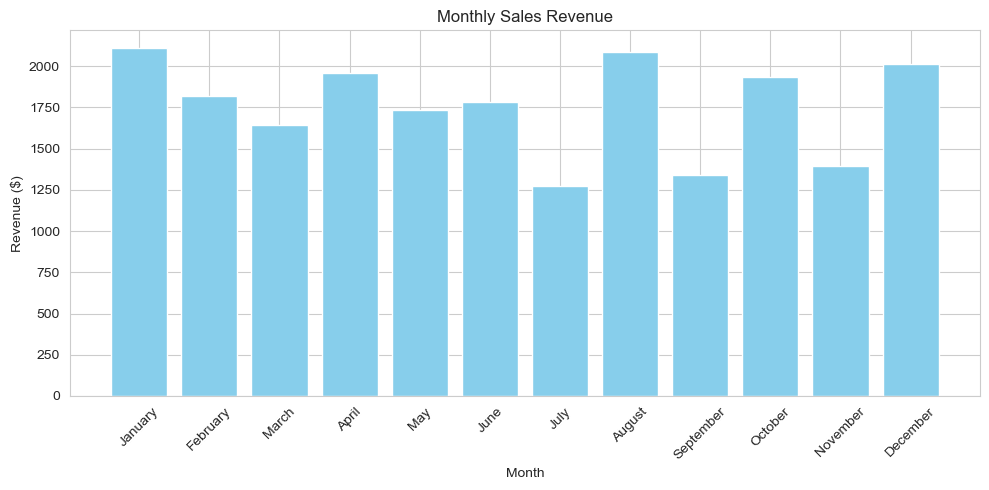

In [38]:
# Question 2: Sales by month
print("📅 Question 2: How do sales vary by month?")

query2 = """
SELECT 
    d.month_name,
    d.month,
    COUNT(*) as num_sales,
    SUM(f.total_amount) as monthly_revenue
FROM fact_sales f
JOIN dim_date d ON f.date_key = d.date_key
GROUP BY d.month_name, d.month
ORDER BY d.month
"""

result2 = pd.read_sql(query2, conn)
print("\nAnswer:")
print(result2.head())

# Visualize it
plt.figure(figsize=(10, 5))
plt.bar(result2['month_name'], result2['monthly_revenue'], color='skyblue')
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Question 3: Customer segmentation
print("👥 Question 3: Who are our best customers?")

query3 = """
SELECT 
    c.customer_name,
    c.customer_type,
    COUNT(f.sale_id) as num_purchases,
    SUM(f.total_amount) as total_spent
FROM fact_sales f
JOIN dim_customer c ON f.customer_key = c.customer_key
GROUP BY c.customer_name, c.customer_type
ORDER BY total_spent DESC
LIMIT 5
"""

result3 = pd.read_sql(query3, conn)
print("\nAnswer:")
print(result3)
print("\n✅ Again, just ONE JOIN needed!")

👥 Question 3: Who are our best customers?

Answer:
   customer_name customer_type  num_purchases  total_spent
0   Diana Wilson       Premium             56      2587.04
1    Eve Johnson       Regular             58      2580.28
2   Henry Taylor       Regular             56      2323.11
3  Iris Anderson       Premium             52      2167.67
4      Bob Smith       Premium             52      2143.13

✅ Again, just ONE JOIN needed!


In [40]:
# Complex Question: Multiple dimensions
print("🔥 Complex Question: Weekend vs Weekday sales by genre")

query4 = """
SELECT 
    b.genre,
    CASE WHEN d.is_weekend = 1 THEN 'Weekend' ELSE 'Weekday' END as day_type,
    COUNT(*) as num_sales,
    SUM(f.total_amount) as total_revenue
FROM fact_sales f
JOIN dim_book b ON f.book_key = b.book_key
JOIN dim_date d ON f.date_key = d.date_key
GROUP BY b.genre, d.is_weekend
ORDER BY b.genre, d.is_weekend
"""

result4 = pd.read_sql(query4, conn)
print("\nAnswer:")
print(result4.head(10))
print("\n✅ Even complex questions need just 2 JOINs!")
print("✅ In a regular database, this might need 5-10 JOINs!")

🔥 Complex Question: Weekend vs Weekday sales by genre

Answer:
       genre day_type  num_sales  total_revenue
0  Adventure  Weekday         30        1170.39
1  Adventure  Weekend         12         463.76
2   Business  Weekday         25        1466.05
3   Business  Weekend          8         465.36
4   Children  Weekday         13         217.27
5   Children  Weekend          8         138.85
6    Cooking  Weekday         23         979.35
7    Cooking  Weekend          9         363.24
8      Crime  Weekday         27        1271.00
9      Crime  Weekend          9         384.82

✅ Even complex questions need just 2 JOINs!
✅ In a regular database, this might need 5-10 JOINs!


---

## 🎯 Part 5: Interview Questions About Star Schema

**Common interview questions and how to answer them:**

In [41]:
print("💼 COMMON INTERVIEW QUESTIONS ABOUT STAR SCHEMA\n")

interview_qa = """
Q1: What is a star schema?
A: A star schema is a data warehouse design with a central fact table 
   surrounded by dimension tables, forming a star shape. It's optimized 
   for fast queries and easy understanding.

Q2: What's the difference between fact and dimension tables?
A: Fact tables store measurable events (sales, clicks) with foreign keys.
   Dimension tables store descriptive attributes (customer details, product info).

Q3: Why use a star schema instead of normalized tables?
A: Star schemas are denormalized for query performance. Fewer JOINs = faster queries.
   Business users find them easier to understand.

Q4: What are the advantages of star schema?
A: • Simple queries (fewer JOINs)
   • Fast performance
   • Easy for business users
   • Works well with BI tools

Q5: What's the difference between star and snowflake schema?
A: Star schema has denormalized dimensions (single table per dimension).
   Snowflake schema has normalized dimensions (multiple related tables per dimension).
   Star is simpler and faster, snowflake saves storage.

Q6: What kind of businesses use star schemas?
A: Almost all! Retail (sales analysis), Tech (user analytics), 
   Finance (transaction analysis), Healthcare (patient analytics), etc.
"""

print(interview_qa)

💼 COMMON INTERVIEW QUESTIONS ABOUT STAR SCHEMA


Q1: What is a star schema?
A: A star schema is a data warehouse design with a central fact table 
   surrounded by dimension tables, forming a star shape. It's optimized 
   for fast queries and easy understanding.

Q2: What's the difference between fact and dimension tables?
A: Fact tables store measurable events (sales, clicks) with foreign keys.
   Dimension tables store descriptive attributes (customer details, product info).

Q3: Why use a star schema instead of normalized tables?
A: Star schemas are denormalized for query performance. Fewer JOINs = faster queries.
   Business users find them easier to understand.

Q4: What are the advantages of star schema?
A: • Simple queries (fewer JOINs)
   • Fast performance
   • Easy for business users
   • Works well with BI tools

Q5: What's the difference between star and snowflake schema?
A: Star schema has denormalized dimensions (single table per dimension).
   Snowflake schema has norma

---

## 🚀 Part 6: Real-World Examples

Let's look at how major companies use star schemas:

In [42]:
print("🏢 REAL-WORLD STAR SCHEMA EXAMPLES\n")

examples = pd.DataFrame({
    'Company': ['Amazon', 'Netflix', 'Uber', 'Spotify', 'Airbnb'],
    'Fact Table': ['fact_orders', 'fact_views', 'fact_rides', 'fact_streams', 'fact_bookings'],
    'Key Dimensions': [
        'Customer, Product, Date, Warehouse',
        'User, Content, Date, Device',
        'Rider, Driver, Date, Location',
        'User, Song, Artist, Date',
        'Guest, Property, Host, Date'
    ],
    'Key Metrics': [
        'Revenue, Quantity, Shipping Cost',
        'Watch Time, Completion Rate',
        'Fare, Distance, Duration',
        'Play Count, Skip Rate',
        'Revenue, Nights, Rating'
    ]
})

print(examples.to_string(index=False))

print("\n💡 Notice: Every major tech company uses star schemas!")
print("   They all follow the same pattern we just learned.")

🏢 REAL-WORLD STAR SCHEMA EXAMPLES

Company    Fact Table                     Key Dimensions                      Key Metrics
 Amazon   fact_orders Customer, Product, Date, Warehouse Revenue, Quantity, Shipping Cost
Netflix    fact_views        User, Content, Date, Device      Watch Time, Completion Rate
   Uber    fact_rides      Rider, Driver, Date, Location         Fare, Distance, Duration
Spotify  fact_streams           User, Song, Artist, Date            Play Count, Skip Rate
 Airbnb fact_bookings        Guest, Property, Host, Date          Revenue, Nights, Rating

💡 Notice: Every major tech company uses star schemas!
   They all follow the same pattern we just learned.


---

## 📝 Practice Exercises

In [43]:
print("📝 PRACTICE EXERCISES\n")

print("Exercise 1: Design a star schema for a coffee shop")
print("  Think about:")
print("  • What would be in the fact table? (hint: sales transactions)")
print("  • What dimensions would you need? (hint: customer, product, date, store)")
print()

print("Exercise 2: Write queries for our bookstore:")
print("  • Find total sales on weekends vs weekdays")
print("  • Find which genre each customer buys most")
print("  • Find the busiest day of the week")
print()

print("Exercise 3: Identify fact vs dimension")
print("  Which table would these go in?")
print("  • Customer's birthday")
print("  • Sale amount")
print("  • Product color")
print("  • Transaction timestamp")
print("  • Store manager name")

📝 PRACTICE EXERCISES

Exercise 1: Design a star schema for a coffee shop
  Think about:
  • What would be in the fact table? (hint: sales transactions)
  • What dimensions would you need? (hint: customer, product, date, store)

Exercise 2: Write queries for our bookstore:
  • Find total sales on weekends vs weekdays
  • Find which genre each customer buys most
  • Find the busiest day of the week

Exercise 3: Identify fact vs dimension
  Which table would these go in?
  • Customer's birthday
  • Sale amount
  • Product color
  • Transaction timestamp
  • Store manager name


---


Exercise 1: 
- Fact table would be order table including orders in the coffee shop. It will include: Order ID, customer ID, product ID, Order Date, Store ID (IF this is a shop chain), amount, quatity. 
- Customer feedback can also be considered to created to enhace cusomer service. It will include: Feedback ID, customer ID, feedback, feedback datetime, order id, product id, Rating.
- Dimentions inlcudeL Cusotmer, product, Store. These table will inlcude ID and its descroption.

In [51]:
#Exercise 2

query1 = """
SELECT case when d.is_weekend = 1 then "Weekend"
else "Weekday"
end as day_category,
sum(total_amount) as total_sales
FROM fact_sales f
left join dim_date d on f.date_key = d.date_key
group by day_category
"""

result1 = pd.read_sql(query1, conn)
print("\nAnswer:")
print(result1)


Answer:
  day_category  total_sales
0      Weekday     15378.66
1      Weekend      5717.57


In [54]:
query2 = """
SELECT c.customer_type,
sum(total_amount) as total_sales
FROM fact_sales f
left join dim_customer c on f.customer_key = c.customer_key
group by c.customer_type
order by total_sales desc
limit 1
"""

result2 = pd.read_sql(query2, conn)
print("\nAnswer:")
print(result2)


Answer:
  customer_type  total_sales
0       Regular     12394.11


In [55]:
query3 = """
SELECT d.day_name,
sum(total_amount) as total_sales
FROM fact_sales f
left join dim_date d on f.date_key = d.date_key
group by d.day_name
order by total_sales desc
limit 1
"""

result3 = pd.read_sql(query3, conn)
print("\nAnswer:")
print(result3)


Answer:
  day_name  total_sales
0  Tuesday      3510.88


---
Exercise 3:
 • Customer's birthday -- dim
  • Sale amount -- fact
  • Product color -- dim
  • Transaction timestamp -- fact
  • Store manager name -- dim

---

## 🎓 Key Takeaways

**You now understand:**

1. **Data Warehouse** = Database optimized for analysis (not operations)
2. **Star Schema** = Central fact table + surrounding dimension tables
3. **Fact Table** = What happened (events, transactions, measurements)
4. **Dimension Tables** = Context (who, what, when, where)
5. **Benefits** = Simple queries, fast performance, business-friendly

**Remember for interviews:**
- Star schemas are THE standard for data warehouses
- Every major company uses them
- They trade storage space for query speed (denormalization)
- Business users love them because they're intuitive

---

## 🚀 Next Steps

You're now ready to:
- Design star schemas for any business
- Understand data warehouse architectures
- Answer interview questions confidently
- Build analytical databases

**Pro tip**: In interviews, draw the star! It shows you truly understand it. ⭐

In [46]:
# Cleanup
#conn.close()

print("✅ Database connection closed.")
print("🎉 Congratulations! You now understand data warehousing!")
print()
print("📊 You learned:")
print("  • What a data warehouse is and why we need them")
print("  • How star schemas work (critical for interviews!)")
print("  • The difference between fact and dimension tables")
print("  • How to build your own star schema")
print("  • How major companies use these concepts")
print()
print("💪 You're ready for data warehouse interview questions!")

✅ Database connection closed.
🎉 Congratulations! You now understand data warehousing!

📊 You learned:
  • What a data warehouse is and why we need them
  • How star schemas work (critical for interviews!)
  • The difference between fact and dimension tables
  • How to build your own star schema
  • How major companies use these concepts

💪 You're ready for data warehouse interview questions!
